# Try RandomForestRegressor with grid of various parameters

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
training_data = pd.read_csv('../Datasets/training_data_full.csv')

In [3]:
non_numerical_features = set([
    'StateAbbr',
    'StateDesc',
    'CityName',
    'CountyFIPS',
    'TractFIPS'
])

target_features = set([
    'diabetes_change_rate_2020'
])

numerical_features = list(
    set(training_data.columns) - non_numerical_features - target_features
)

In [4]:
features = training_data[numerical_features]
labels = training_data['diabetes_change_rate_2020']

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size = 0.2, random_state =15)

In [14]:
regr = RandomForestRegressor(max_depth=10, n_estimators=500,random_state=15, n_jobs=16)

In [15]:
history = regr.fit(X_train, Y_train)

Train R2 score is 0.54933
Test R2 score is 0.17792


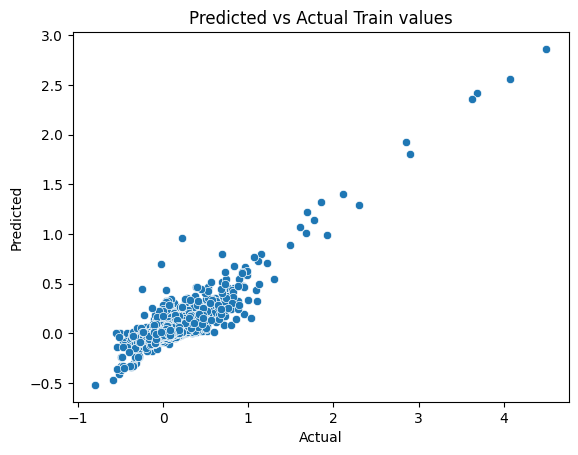

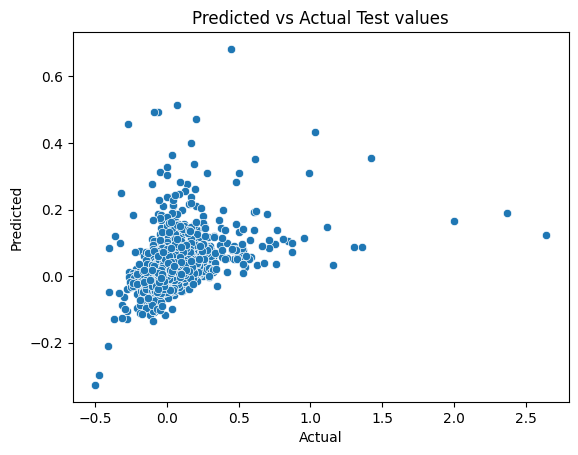

In [16]:
%run -i ./Model_Eval.ipynb
evaluate_regression_model(
    regr,
    None,
    X_train,
    Y_train,
    X_test,
    Y_test
)

In [9]:
regr.feature_importances_

array([0.0086889 , 0.05292612, 0.01733896, 0.00830271, 0.00697269,
       0.04166492, 0.01645385, 0.03296353, 0.00848975, 0.01847457,
       0.01154615, 0.02665418, 0.04283548, 0.01867611, 0.01830501,
       0.01511635, 0.00523467, 0.03847066, 0.02709199, 0.02210711,
       0.01858807, 0.01446063, 0.02249618, 0.01842718, 0.00798296,
       0.01091925, 0.0845232 , 0.0200217 , 0.02089811, 0.05303401,
       0.02899223, 0.00666883, 0.02269305, 0.01106495, 0.05406793,
       0.03536939, 0.04183016, 0.01176162, 0.02210682, 0.00679737,
       0.00825161, 0.04073106])

In [10]:
# plt.figure(figsize=(15,10))
# plt.barh(numerical_features, regr.feature_importances_)